In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import klib

In [2]:
dataset= pd.read_csv("Train.csv")
df=dataset
dataset
df.loc[(df['Item_Fat_Content']=='LF') | (df['Item_Fat_Content']=='low fat') | (df['Item_Fat_Content']=='LOW'),'Item_Fat_Content']='Low Fat'
df.loc[(df['Item_Fat_Content']=='reg'),'Item_Fat_Content']='Regular'
df.Item_Fat_Content.unique()
df["Item_Weight"]=df[["Item_Weight"]].fillna(df["Item_Weight"].mean())
mode_val=df[["Outlet_Size","Outlet_Type"]].pivot_table(index='Outlet_Type', aggfunc=(lambda x: x.mode()))
missing=df["Outlet_Size"].isnull()
df.loc[missing, "Outlet_Size"]=df.loc[missing, "Outlet_Type"].apply(lambda x: mode_val.loc[x])
df=klib.convert_datatypes(df)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,FDX07,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,732.380005
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.521805,OUT013,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.156998,OUT045,2002,Small,Tier 2,Supermarket Type1,549.284973
8520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.133202,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# 1. Basic Details of Data

In [56]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,0.066132,140.992767,1997.831867,2181.288818
std,4.226130,0.051598,62.275051,8.371760,1706.501221
min,4.555000,0.000000,31.290001,1985.000000,33.290001
25%,9.310000,0.026989,93.826500,1987.000000,834.247406
50%,12.857645,0.053931,143.012802,1999.000000,1794.331055
75%,16.000000,0.094585,185.643700,2004.000000,3101.296387
max,21.350000,0.328391,266.888397,2009.000000,13086.964844


In [55]:
df.dtypes

Item_Identifier                string
Item_Weight                   float32
Item_Fat_Content             category
Item_Visibility               float32
Item_Type                    category
Item_MRP                      float32
Outlet_Identifier            category
Outlet_Establishment_Year       int16
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float32
dtype: object

In [49]:
df.apply(lambda x: x.nunique())

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [57]:
#counts null value as 1 category
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7879
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Categorical Variables

In [4]:
#check categorical variables
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object" or df.dtypes[x]=="category":
        cat_col.append(x)
for col in cat_col:
    print(col)
    print(df[col].value_counts()*100/len(df))
    print()

Item_Fat_Content
Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64

Item_Type
Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

Outlet_Identifier
OUT027    10.970316
OUT013    10.935117
OUT035    10.911651
OUT046    10.911651
OUT049    10.911651
OUT045    10.899918
OUT018    10.888185
OUT017    10.864719
OUT010     6.511792
OUT019     6.195002
Name: Outlet_Identifier, dtype: float64

Outlet_Size
Small     56.294732
Medium 

<Axes: title={'center': 'Feature-correlation (pearson)'}>

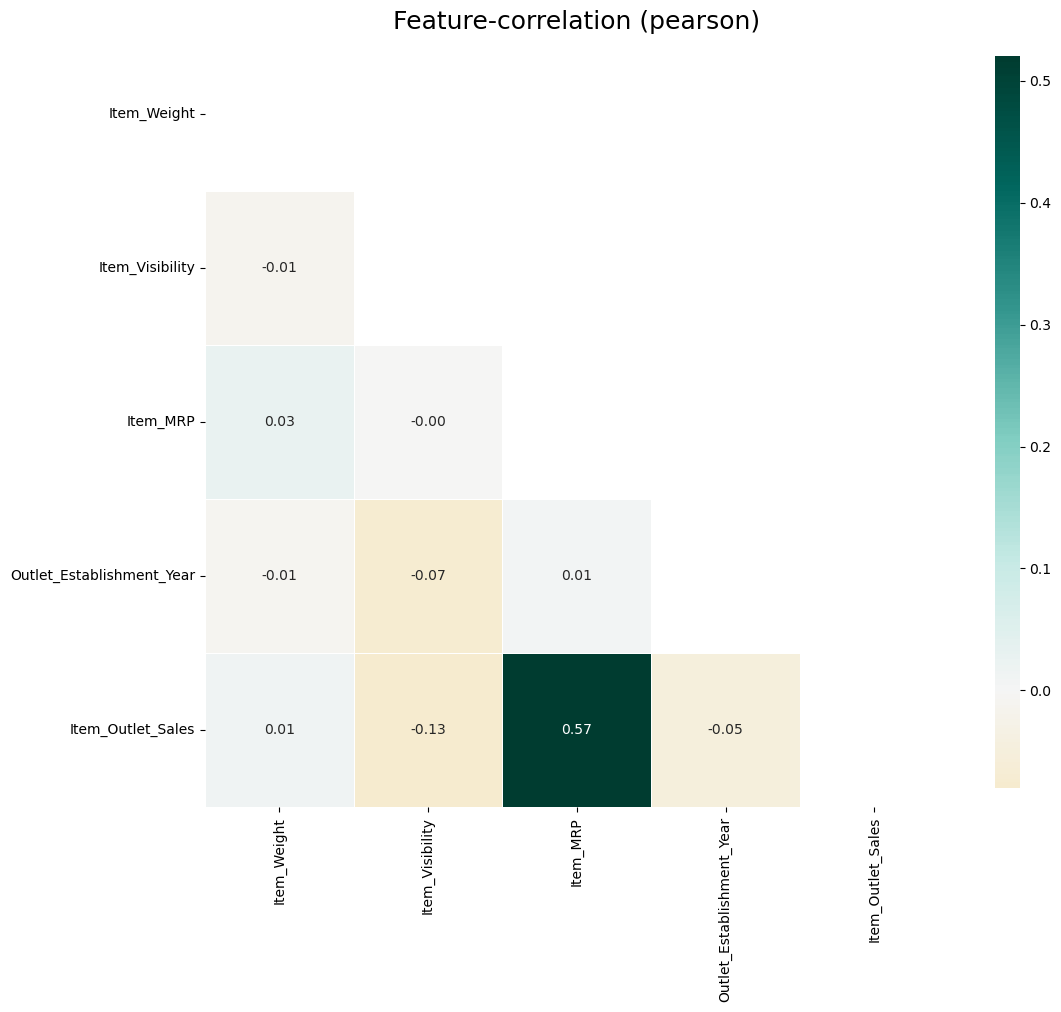

In [38]:
import klib

klib.corr_plot(df)

<Axes: xlabel='item_outlet_sales', ylabel='Density'>

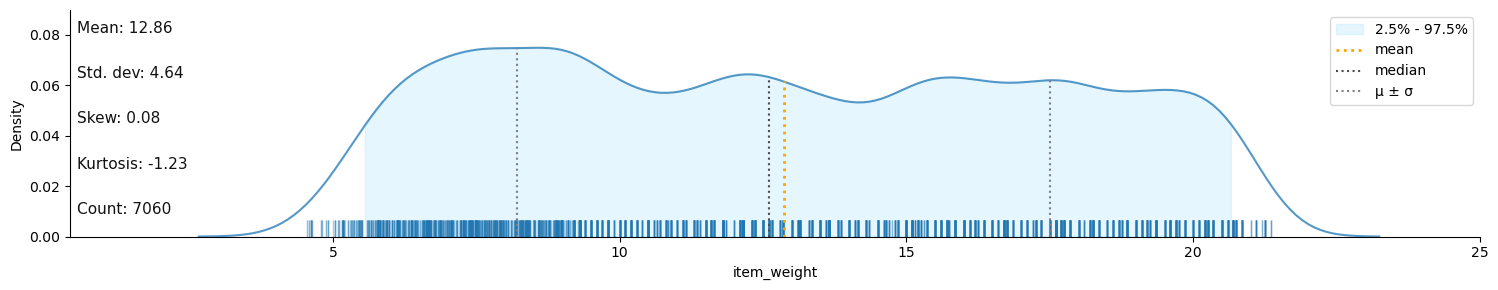

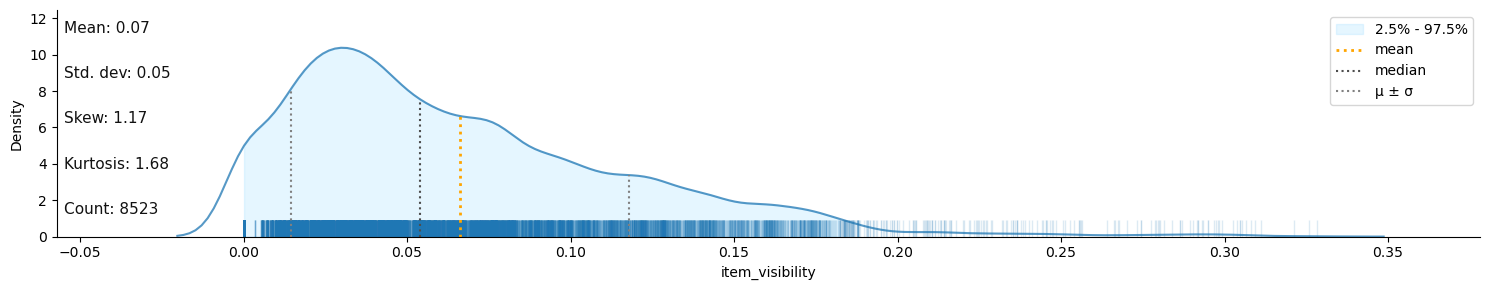

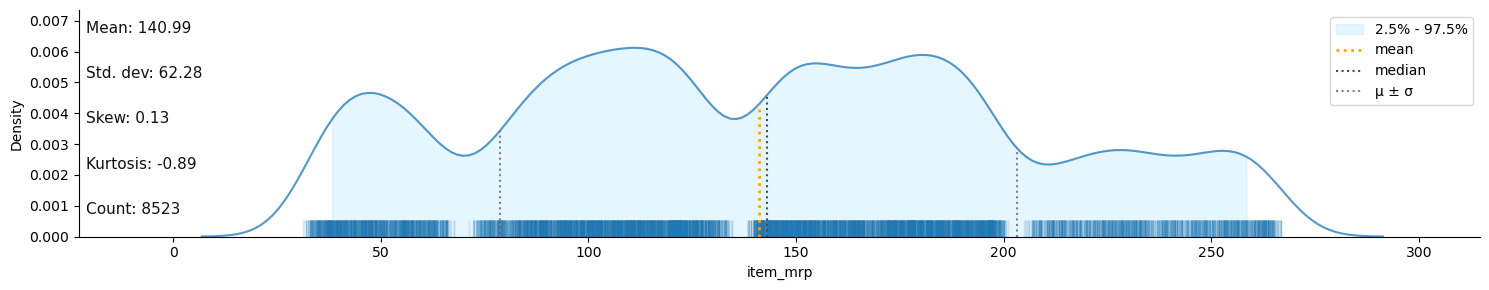

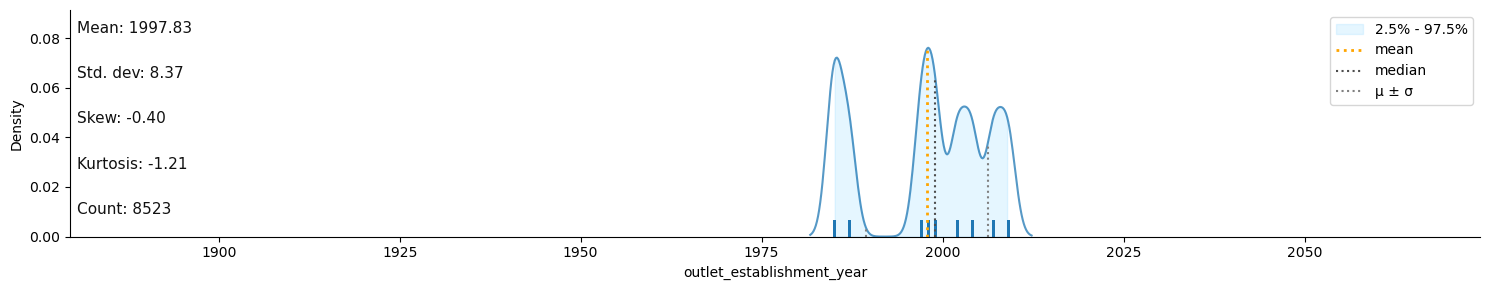

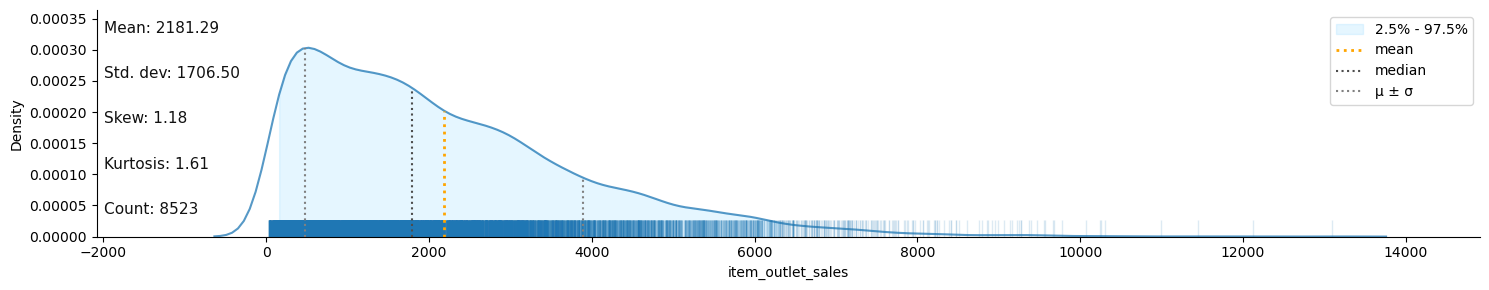

In [32]:
klib.dist_plot(df)

# 2. Data Cleaning

## Optimising dataset

In [26]:
# df=klib.data_cleaning(df)
# df.columns

Shape of cleaned data: (8523, 12) - Remaining NAs: 3873


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [39]:
df=klib.convert_datatypes(df)
df.dtypes

Item_Identifier                string
Item_Weight                   float32
Item_Fat_Content             category
Item_Visibility               float32
Item_Type                    category
Item_MRP                      float32
Outlet_Identifier            category
Outlet_Establishment_Year       int16
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float32
dtype: object

## Values correction in Item_Fat_Content

In [3]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [40]:
df.loc[(df['Item_Fat_Content']=='LF') | (df['Item_Fat_Content']=='low fat') | (df['Item_Fat_Content']=='LOW'),'Item_Fat_Content']='Low Fat'
df.loc[(df['Item_Fat_Content']=='reg'),'Item_Fat_Content']='Regular'
df.Item_Fat_Content.unique()

['Low Fat', 'Regular']
Categories (5, object): ['LF', 'Low Fat', 'Regular', 'low fat', 'reg']

## Null Values

In [5]:
df.isnull().sum()
# round(dataset.isnull().sum()*100/len(dataset),2)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Item Weight missing values replaced ==> Mean

In [67]:
df["Item_Weight"].mean()

12.857645184135976

In [68]:
df["Item_Weight"]=df[["Item_Weight"]].fillna(df["Item_Weight"].mean())

#### Outlet Size missing values replaced ==> Mode with respect to outlet type

In [69]:
new=df[["Outlet_Size","Outlet_Type"]]
new

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,NaN,Grocery Store
4,High,Supermarket Type1
...,...,...
8518,High,Supermarket Type1
8519,NaN,Supermarket Type1
8520,Small,Supermarket Type1
8521,Medium,Supermarket Type2


In [70]:
mode_val=new.pivot_table(index='Outlet_Type', aggfunc=(lambda x: x.mode()))
mode_val

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [71]:
missing=df["Outlet_Size"].isnull()
df.loc[missing, "Outlet_Size"]=df.loc[missing, "Outlet_Type"].apply(lambda x: mode_val.loc[x])

In [72]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outliers

<Axes: >

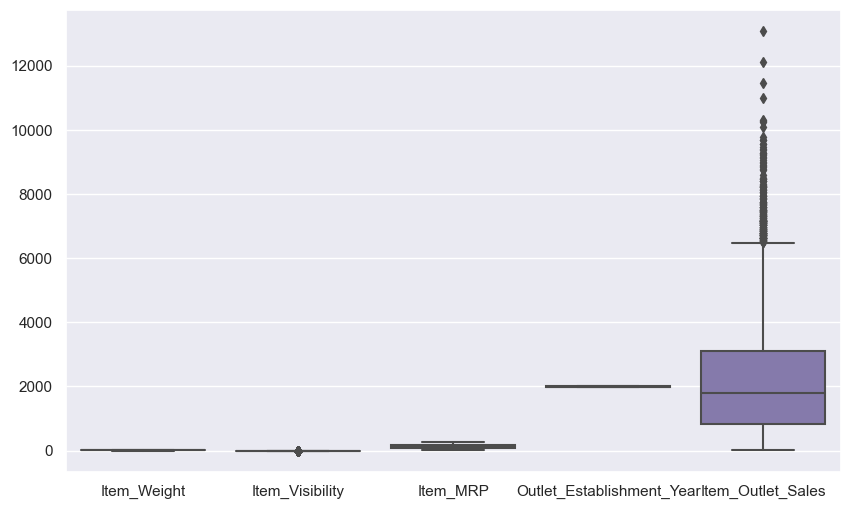

In [73]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(df)

- No visible outliers.
- Item sales expected to have outliers as some items are very expensive

# 3. EDA


### 1) Are items that are more visible, also more sold?

In [10]:
# Items with zero visibility
(df.Item_Visibility==0).sum()*100/len(df)

6.1715358441863195

In [11]:
# are they still getting sold??
df[df.Item_Visibility==0].Item_Outlet_Sales.sum()

1169057.5802

Items with zero visibility don't make sense, especially when they are being sold irrespective of zero visibility

! Inference w.r.t data??

In [12]:
# df1.drop(df1.index([df1["Item_Visibility"]==0]))
df=df.drop(df[df["Item_Visibility"]==0].index)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

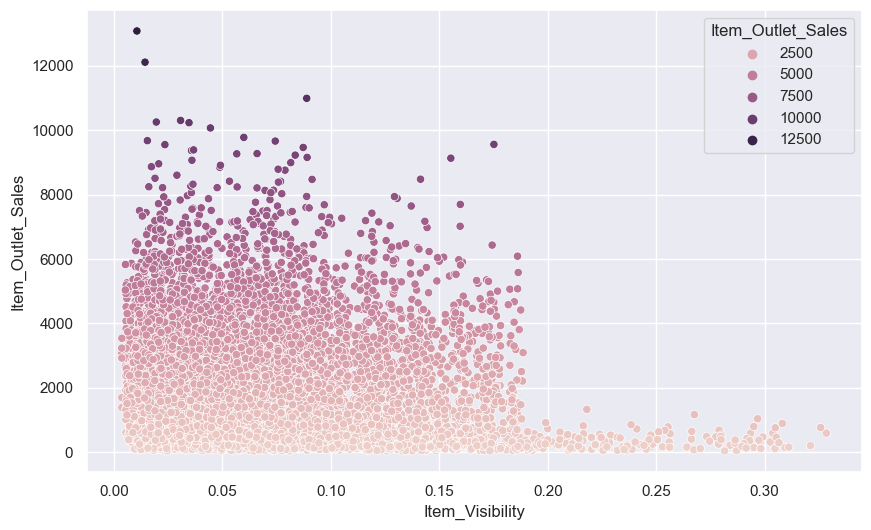

In [13]:
# dataset[["Item_Visibility", "Item_Outlet_Sales"]].plot.scatter(x=0, y=1)
sns.scatterplot(data=df,x="Item_Visibility", y="Item_Outlet_Sales", hue="Item_Outlet_Sales")

#### Result
- No Relation
- People buy what they want to irrespective of the visibility

### 2) Which items are sold the most?

<Axes: >

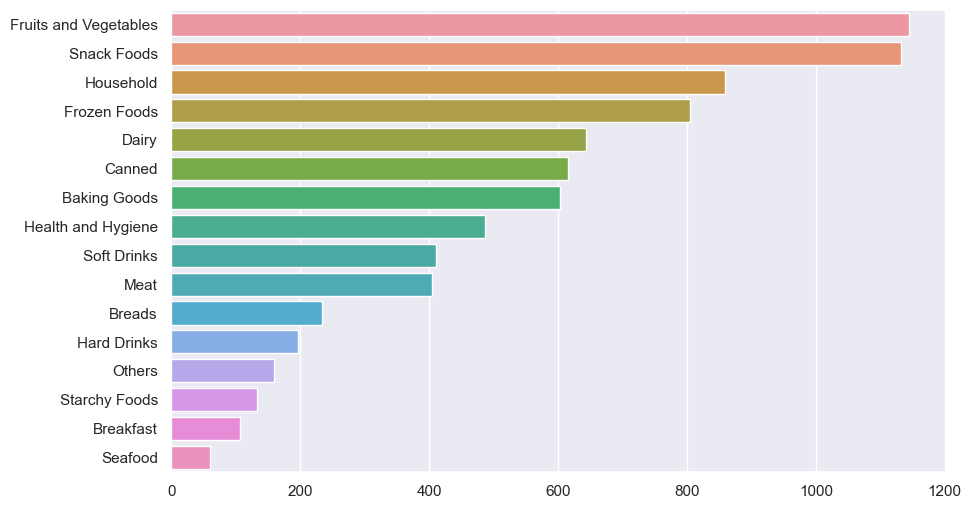

In [42]:
items=df.Item_Type.value_counts()
sns.barplot( y=items.index, x=items.values)

- Fruits and Vegetables are sold the most
- Seafood is sold the least

### 3) Is the oldest Outlet the one with most sales?

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

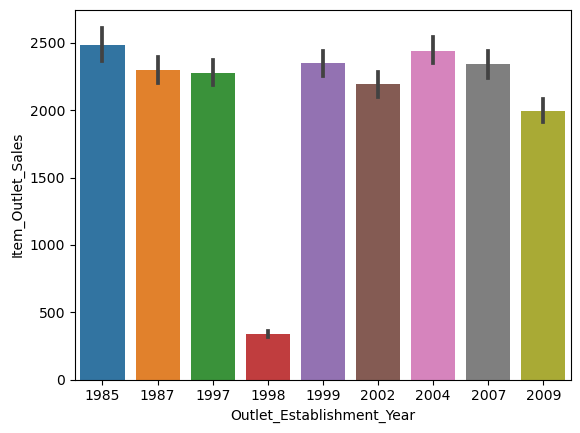

In [26]:
sns.barplot(data=df, y=df.Item_Outlet_Sales, x=df.Outlet_Establishment_Year)

In [21]:
df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

#### RESULT
- The oldest store has the highest sales (1985)
- Why 1998 oulet sales so low?
- 1. Are the items there are less?
- 2. Do people not like it only?

In [53]:
df[["Outlet_Identifier","Outlet_Establishment_Year"]].value_counts()

Outlet_Identifier  Outlet_Establishment_Year
OUT027             1985                         935
OUT013             1987                         932
OUT035             2004                         930
OUT046             1997                         930
OUT049             1999                         930
OUT045             2002                         929
OUT018             2009                         928
OUT017             2007                         926
OUT010             1998                         555
OUT019             1985                         528
dtype: int64

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

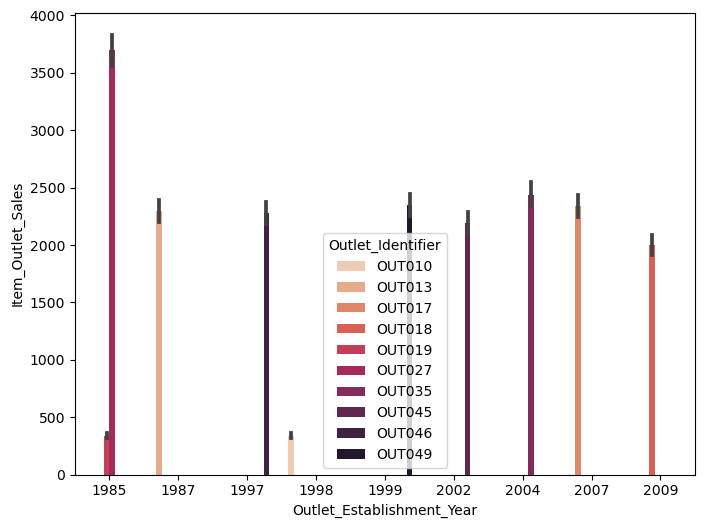

In [49]:
fig,ax= plt.subplots(figsize=(8,6))
sns.barplot(data, hue=data.Outlet_Identifier, x=data.Outlet_Establishment_Year, y=data.Item_Outlet_Sales,palette="rocket_r")

##### Reason
- Yes there are less items. That's why 1998 outlet and one of 1985 outlet is low.
##### Business insight: 
- People tend to buy from stores that have more items
- People buy from stores that are old as well as have more items
- Stores with just half the items have extremely low sales

### 4) Do people buy low fat products more?

In [103]:
fat=df.Item_Fat_Content.value_counts().reset_index()
fat.iloc[:,0]

0    Low Fat
1    Regular
Name: index, dtype: object

([<matplotlib.patches.Wedge at 0x22054bf2650>,
 [Text(-0.4910806225038549, 0.9842966129176847, 'Low Fat'),
  Text(0.4910806225038548, -0.9842966129176849, 'Regular')],
 [Text(-0.2678621577293754, 0.5368890615914643, '64.73%'),
  Text(0.2678621577293753, -0.5368890615914644, '35.27%')])

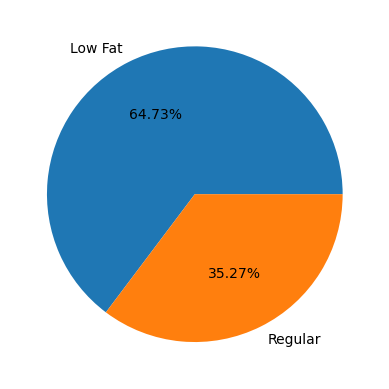

In [108]:
plt.pie(fat.iloc[:,1], labels=fat.iloc[:,0], autopct="%0.2f%%")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1852\390807457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fat_sales=df.groupby("Item_Fat_Content").sum()["Item_Outlet_Sales"]


Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

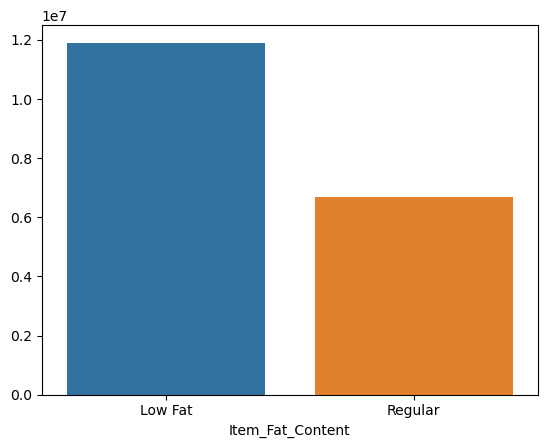

In [124]:
fat_sales=df.groupby("Item_Fat_Content").sum()["Item_Outlet_Sales"]
sns.barplot(x=fat_sales.index, y= fat_sales.values)
fat_sales

#### Result
- People are health consious and buy low fat products more

### 5) Which outlet size have most sales?

#### Expected - Positive Relationship

In [304]:
x.pivot_table(index="Outlet_Size", aggfunc='mean')

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1867.182814


<Axes: xlabel='Outlet_Size'>

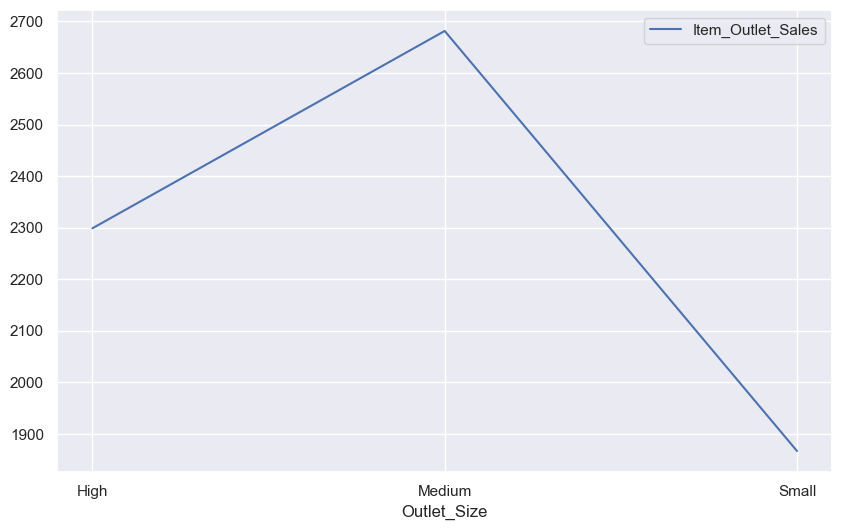

In [303]:
sns.lineplot(x.pivot_table(index="Outlet_Size", aggfunc='mean'))

In [297]:
df.Outlet_Size.value_counts()

Small     4509
Medium    2615
High       873
Name: Outlet_Size, dtype: int64

#### Result 
- Medium sized stores have the highest item sales
- Small sized stores are more in number than medium and high combined

### 6) Which Tier has most sales?

In [163]:
tier_sales=dataset[["Outlet_Location_Type","Item_Outlet_Sales"]].groupby(by="Outlet_Location_Type").sum().reset_index()
tier_sales

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4.482059e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.636753e+06


<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

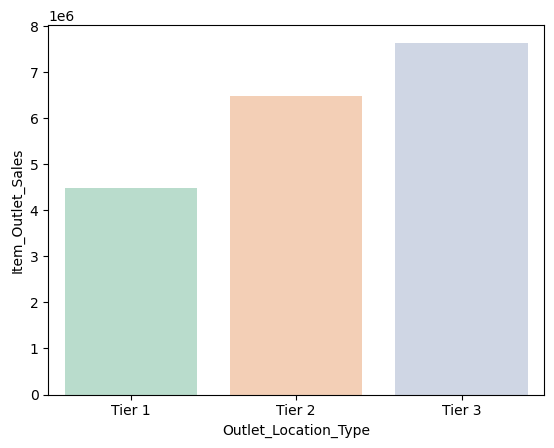

In [180]:
pal=sns.color_palette("rocket", as_cmap=True)
sns.barplot(tier_sales, x=tier_sales.Outlet_Location_Type, y=tier_sales.Item_Outlet_Sales, palette="Pastel2")

In [156]:
city=df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]].reset_index()
df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1852\1986567131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city=df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]].reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1852\1986567131.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["Outlet_Location_Type","Outlet_Type"]).sum()[["Item_Outlet_Sales"]]


Item_Outlet_Sales
Outlet_Location_Type Outlet_Type                         
Tier 1               Grocery Store           1.796941e+05
                     Supermarket Type1       4.302365e+06
Tier 2               Supermarket Type1       6.472314e+06
Tier 3               Grocery Store           1.883402e+05
                     Supermarket Type1       2.142664e+06
                     Supermarket Type2       1.851823e+06
                     Supermarket Type3       3.453926e+06

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

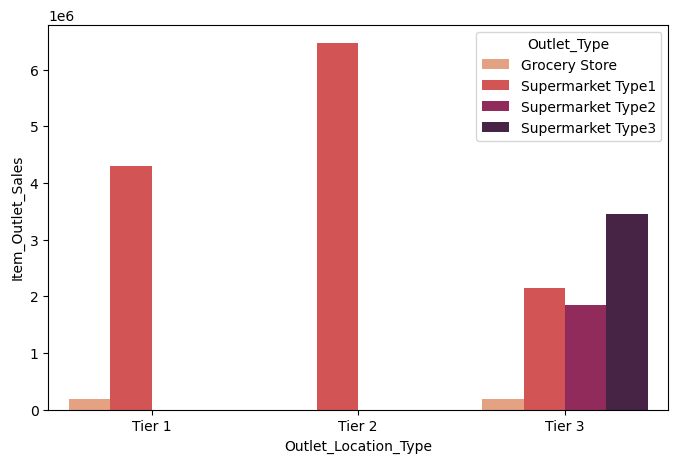

In [186]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(city, hue=city.Outlet_Type, x=city.Outlet_Location_Type, y=city.Item_Outlet_Sales, ax=ax, palette="rocket_r")

#### Result
- Tier 3 has the highest sales
- Sales Outlet wise is distributed for tier 3 (In all 4 types of stores) and concentrated for tier 2 (In just 1 store)
##### Tier 3 is probably metro city and Tier 1 is town area
##### Supermarket type3 only available in metro cities/tier 3

### 7) Do people prefer light items or heavy?

In [215]:
df.Item_Weight.mean()

12.857645184135976

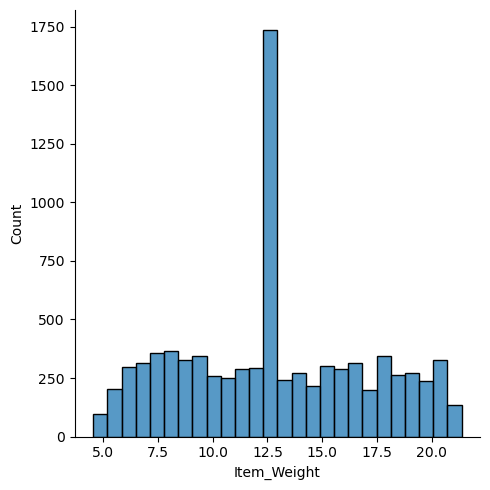

In [201]:
sns.displot(df.Item_Weight)

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

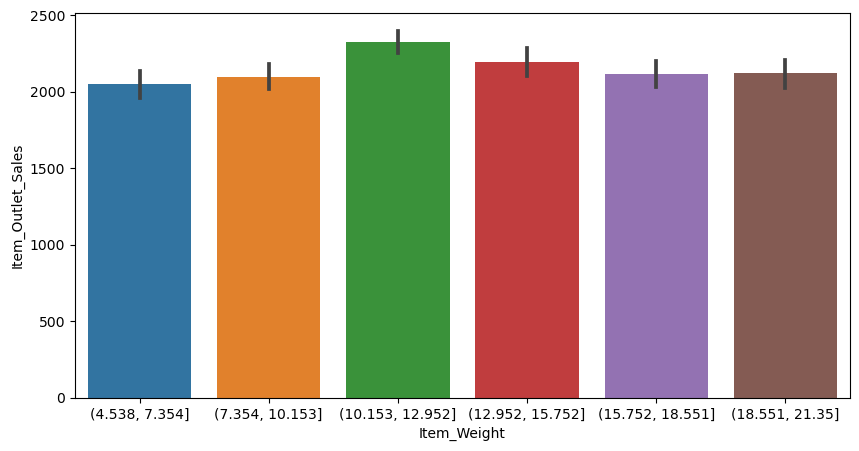

In [232]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(df,x=pd.cut(df.Item_Weight, bins=6), y=df.Item_Outlet_Sales, ax=ax)

#### Result
- Most of the data is distributed around the mean => Normal distibution
- People buy all kinds of product, light as well as heavy

***
# 3. DATA PREPROCESSING FOR MODEL
***


## Encoding

In [211]:
# ignore
# for debugging and resetting dataset
test= pd.read_csv("test.csv")
df= pd.concat([dataset,test], axis=0)
df.loc[(df['Item_Fat_Content']=='LF') | (df['Item_Fat_Content']=='low fat') | (df['Item_Fat_Content']=='LOW'),'Item_Fat_Content']='Low Fat'
df.loc[(df['Item_Fat_Content']=='reg'),'Item_Fat_Content']='Regular'
df.Item_Fat_Content.unique()
df["Item_Weight"]=df[["Item_Weight"]].fillna(df["Item_Weight"].mean())
mode_val=df[["Outlet_Size","Outlet_Type"]].pivot_table(index='Outlet_Type', aggfunc=(lambda x: x.mode()))
missing=df["Outlet_Size"].isnull()
df.loc[missing, "Outlet_Size"]=df.loc[missing, "Outlet_Type"].apply(lambda x: mode_val.loc[x])
df=klib.convert_datatypes(df)

~ Will one hot encoding give better accuracy?

For ordinal variables, no.

Example: for a data
- a > b > c > d

For x => a (real), Its better that the model predicts:
- x => b (predicted ordinally) 
- than 
- x => d (predicted nominally)

In [220]:
df=df.reset_index()

#### One Hot Encoder
- Creates alot of categories
- Only used for two nominal columns

! Take only top 10 categories if model efficiency is compromised because of columns

In [221]:
from sklearn.preprocessing import OneHotEncoder
oneHot= OneHotEncoder()

x=oneHot.fit_transform(df[["Item_Type","Outlet_Identifier"]]).toarray()
y=oneHot.get_feature_names_out()
df1=pd.concat([df,pd.DataFrame(x, columns=y)], axis=1)
# pd.DataFrame(x, columns=y).size

In [222]:
df1=df1.drop(columns=["Item_Type", "Outlet_Identifier"])
df1.tail(2)

,level_0,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
14202,14202,5679,FDJ26,15.3,Regular,0.00000,214.621796,2007,Small,Tier 2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14203,14203,5680,FDU37,9.5,Regular,0.10472,79.795998,2002,Small,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Label Encoder
- Easier to implement 
- but should be used only for target variable

In [223]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder= LabelEncoder()

# df1[["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]]=df[["Item_Fat_Content",
#     "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]].apply(labelencoder.fit_transform)
# df1.iloc[:,:15]

Label encoder has encoded Outlet Size as
- High>Medium>Small (Alphabetically)
- 0, 1, 2
- Changing the order through ordinal encoder
 
==> Its better to use ordinal encoder for dependant variables

#### Ordinal Encoder
- Same as label encoder
- But we can specify order

Eg- Cold, hot, warm
- Label Encoder => 0,1,2 (alphabetically)
- Ordinal Encoder => 0,1,2 (alphabetically)
- But we have option to give cold>warm>hot 
- Hence: Cold, hot, warm => 0,2,1

In [224]:
from sklearn.preprocessing import OrdinalEncoder

outlet_size_encoder= OrdinalEncoder(categories=[["Small","Medium", "High"]], dtype=np.str_)
ordencoder= OrdinalEncoder()

df1[["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Type"]]=ordencoder.fit_transform(df1[["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Type"]])
df1[["Outlet_Size"]]=outlet_size_encoder.fit_transform(df1[["Outlet_Size"]])
df1

,level_0,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,FDA15,9.300000,0.0,0.016047,249.809204,1999,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,DRC01,5.920000,1.0,0.019278,48.269199,2009,1,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,FDN15,17.500000,0.0,0.016760,141.617996,1999,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,3,FDX07,19.200001,1.0,0.000000,182.095001,1998,0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,NCD19,8.930000,0.0,0.000000,53.861401,1987,2,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,14199,5676,FDB58,10.500000,1.0,0.013496,141.315399,1997,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14200,14200,5677,FDD47,7.600000,1.0,0.142991,169.144806,2009,1,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14201,14201,5678,NCO17,10.000000,0.0,0.073529,118.744003,2002,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14202,14202,5679,FDJ26,15.300000,1.0,0.000000,214.621796,2007,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***
# 4) APPLYING ML MODELS
***

Regression problem

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, y_

***
# References For Me
***

### ~Pandas Profiling

HTML EDA Report generated in notebook's directory

In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from ydata_profiling import ProfileReport

df = pd.DataFrame(dataset)
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_widgets()
# not working

In [ ]:
profile.to_file("your_report.html")

### ~klib

In [ ]:
 klib.describe - functions for visualizing datasets
- klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
- klib.corr_mat(df) # returns a color-encoded correlation matrix
- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
- klib.dist_plot(df) # returns a distribution plot for every numeric feature
- klib.missingval_plot(df) # returns a figure containing information about missing values

 klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of informationm